In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import regex
import re
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.metrics import classification_report
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib notebook

In [3]:
def fonction_nettoyage_text(df):
    # supprission des ponctuations
    rm_ponct = str.maketrans('','',string.punctuation)
    df = df.apply(lambda x:x.translate(rm_ponct))
    # suppression les unicodes
    df = df.apply(lambda x:x.encode("ascii","ignore").decode("utf-8"))
                                                
    # suppression des URLs
    df = df.apply(lambda x:re.sub(r'http\S+',"",x))
    
    # suppression des stopwords
    stop_en = stopwords.words("english")
    df = df.apply(lambda x:" ".join(x.lower() for x in np.str(x).split() if x.lower() not in stop_en))
                                                  # Lemmatisation
    df = df.apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
                  
    return(df)

dataset = pd.read_csv("data_set_version_final.csv")
dataset.resume=fonction_nettoyage_text(dataset.resume)

X_train,X_test,Y_train,y_test = train_test_split(dataset.resume,dataset.Labels,test_size=0.3,shuffle=True)
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=0.3,shuffle=True)

In [4]:
from Doc2VecTransformer import EmbeddingDoc2Vec
docvecbd=EmbeddingDoc2Vec(dm=0)
docvecbd.fit(x_train,y_train)

y_train,X_embeded_train_D2v=docvecbd.transform(x_train,y_train)
y_val,X_embeded_val_D2v=docvecbd.transform(x_val,y_val)
y_test,X_embeded_test_D2v=docvecbd.transform(X_test,y_test)

100%|██████████| 92717/92717 [00:00<00:00, 3160984.54it/s]


## PCA :

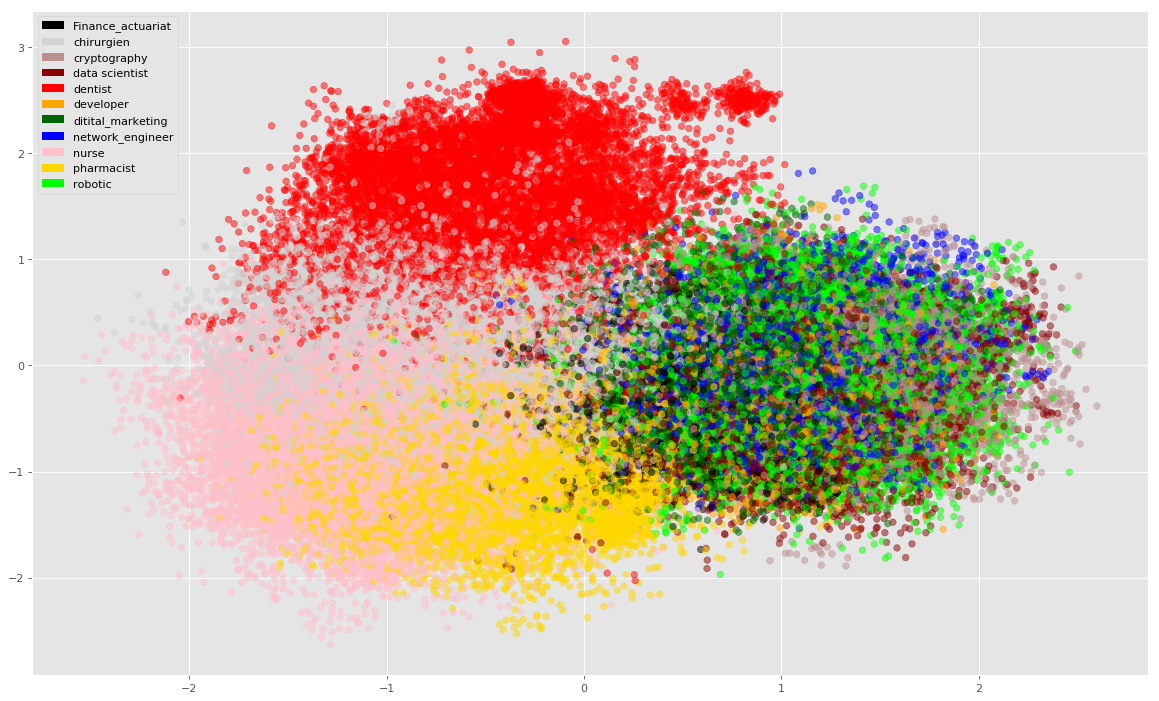

In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import 
import matplotlib.patches as mpatches


color=["black","lightgray","rosybrown","darkred","red","orange","darkgreen","blue","pink","gold","lime"]
def affect_color(color_list,y):
    dict_col={name:color_list[k] for k,name in enumerate(np.unique(y)) }
    color_corr=[dict_col[k] for k in y]
    return color_corr , dict_col


X_pca = PCA().fit_transform(X_embeded_train_D2v )
coloration,color_dict=affect_color(color,y_train)

recs = [mpatches.Rectangle((0,0),1,1,fc=col) for col in color_dict.values()]

plt.figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=coloration,alpha=0.5)
plt.legend(recs,list(color_dict.keys()),loc='upper left');

## tSNE:

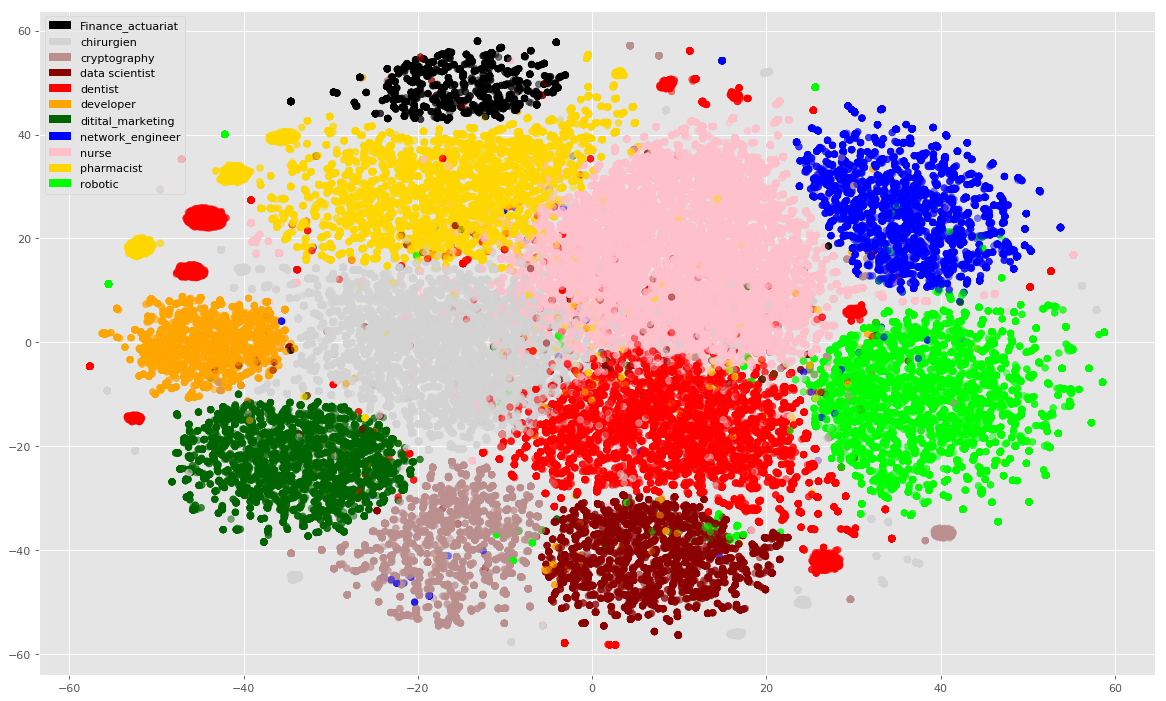

In [6]:
from sklearn.manifold import TSNE

color=["black","lightgray","rosybrown","darkred","red","orange","darkgreen","blue","pink","gold","lime"]
def affect_color(color_list,y):
    dict_col={name:color_list[k] for k,name in enumerate(np.unique(y)) }
    color_corr=[dict_col[k] for k in y]
    return color_corr , dict_col


X_tsne = TSNE().fit_transform(X_embeded_train_D2v )
coloration,color_dict=affect_color(color,y_train)

recs = [mpatches.Rectangle((0,0),1,1,fc=col) for col in color_dict.values()]

plt.figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=coloration,alpha=0.5)
plt.legend(recs,list(color_dict.keys()),loc='upper left');